In [1]:
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt

from sys import argv
import warnings
import time
import os

In [2]:
#---------------------------------------
# Input some parameters from parameter.ipynb
#---------------------------------------
%run parameter.ipynb

#---------------------------------------
# Input parameters used in this program:

###-------------------------------------
### Path name & outname & imageName
# path_image, path_BT, path_figure
# outname_b4,  outname_b7
# BT_B4, BT_B7

###-----------
# criteria and rms for the imaging
# I_clip_b4, I_clip_b7

In [3]:
%%time
#---------------------------------------    
# Calculate the brightness temperature ratio
#---------------------------------------

# Input 2 band information
band_1 = BT_B4
band_2 = BT_B7
band_1_name = 'B4'
band_2_name = 'B7'

#---------------------------------------
# Get the data and the header
# caution: header is from Stokes I
BT_b1_data = pyfits.getdata(band_1)
BT_b1_hd = pyfits.getheader(band_1)
BT_b2_data = pyfits.getdata(band_2)
BT_b2_hd = pyfits.getheader(band_2) 

#---------------------------------------
# Calculate the brightness temperature ratio
BT_b1_div_BT_b2 = np.divide(BT_b1_data, BT_b2_data)

# Save the brightness temperature ratio FITS file
# caution: header is from Stokes I
pyfits.writeto('%sBT_%s_div_BT_%s.fits'%(path_BT, band_1_name, band_2_name), \
               BT_b1_div_BT_b2, BT_b1_hd, overwrite=True)

CPU times: user 70.8 ms, sys: 162 ms, total: 233 ms
Wall time: 297 ms


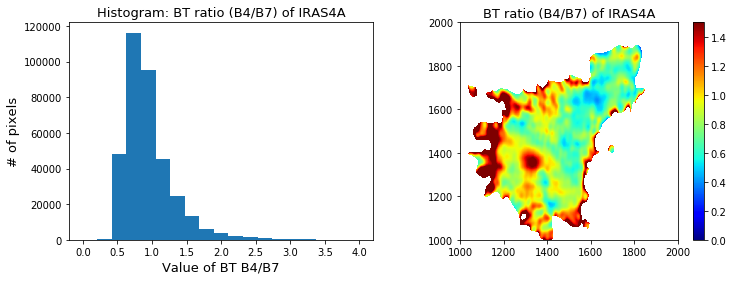

CPU times: user 1.1 s, sys: 161 ms, total: 1.26 s
Wall time: 943 ms


In [4]:
%%time
#---------------------------------------
# Plot the figure: brightness temperature ratio 
#---------------------------------------

# flatten the brightness temperature for ploting the figure
BT_b1_div_BT_b2_1d = BT_b1_div_BT_b2[0][0].flatten()

#---------------------------------------
# plot the figure
fig, axs = plt.subplots(1,2,figsize=(12,4))

# Figure 1: Plot the histogram
axs[0].hist
bins = np.linspace(0,4,20)
axs[0].hist(BT_b1_div_BT_b2_1d, bins)
axs[0].set_title('Histogram: BT ratio (%s/%s) of IRAS4A'%(band_1_name, band_2_name),fontsize=13)
axs[0].set_xlabel('Value of BT %s/%s'%(band_1_name, band_2_name),fontsize=13)
axs[0].set_ylabel('# of pixels',fontsize=13)

# Figure 2: Plot the BT ratio image
cax = axs[1].imshow(BT_b1_div_BT_b2[0][0], vmin=0, vmax=1.5, cmap='jet')
axs[1].set_xlim(1000,2000)
axs[1].set_ylim(1000,2000)
axs[1].set_title('BT ratio (%s/%s) of IRAS4A'%(band_1_name, band_2_name),fontsize=13)
cbar = fig.colorbar(cax)
plt.show()

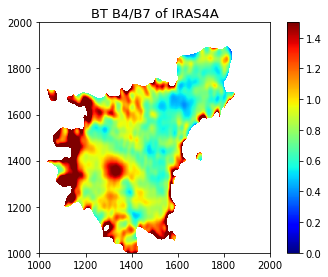

CPU times: user 969 ms, sys: 151 ms, total: 1.12 s
Wall time: 786 ms


In [5]:
%%time
#---------------------------------------
# Plot & save the figure: brightness temperature ratio 
#---------------------------------------

#---------------------------------------
# plot the figure
fig = plt.figure()
ax = fig.add_axes([0.12,0.12,0.8,0.8]) # left, bottom, width, height (range 0 to 1)  
ax.set_title('BT %s/%s of IRAS4A'%(band_1_name, band_2_name),fontsize=13)

# Plot the beta image
cax = ax.imshow(BT_b1_div_BT_b2[0][0], vmin=0, vmax=1.5, cmap='jet')
ax.set_xlim(1000,2000)
ax.set_ylim(1000,2000)
cbar = fig.colorbar(cax)
plt.savefig('%sBT_%s_div_BT_%s.pdf'%(path_BT, band_1_name, band_2_name))
plt.show()